# LIU Tunespread Check

In [1]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

### Figure parameters

In [2]:
plt.rcParams['figure.figsize'] = [5.0, 5.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['lines.linewidth'] = 1.5

### Function Declarations

In [3]:
def harmonic_fn(x, a, b, c, d):
    return a + b*np.cos(c + 2*np.pi*d*x)

def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

def Md_fit(x, a, b, c, d):
        return a + b*np.cos(c*x+d)
    
def Md_ramp_fit(x, a, b, c, d):
    return a + b*(x-1)*np.cos(c*(x-1)+d)

def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [4]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

## Import Data

In [5]:
#Horizontal Scan No Space Charge

# Create dd dictionary
dd3 = dict()

dd3 = add_input_file(dd3, '01_PreLIU_Nominal/output/output.mat', 'PreLIU Nominal')
dd3 = add_input_file(dd3, '02_PreLIU_BCMS/output/output.mat', 'PreLIU BCMS')
dd3 = add_input_file(dd3, '03_LIU_Nominal/output/output.mat', 'LIU Nominal')
dd3 = add_input_file(dd3, '04_LIU_BCMS/output/output.mat', 'LIU BCMS')

	Added output data from  01_PreLIU_Nominal/output/output.mat 	 dictionary key:  PreLIU Nominal
	Added output data from  02_PreLIU_BCMS/output/output.mat 	 dictionary key:  PreLIU BCMS
	Added output data from  03_LIU_Nominal/output/output.mat 	 dictionary key:  LIU Nominal
	Added output data from  04_LIU_BCMS/output/output.mat 	 dictionary key:  LIU BCMS


### Plot Parameters

In [6]:
save_folder = 'Plots/'

sc = 'SbS'
legend_label = 'Case' # r'$\frac{\delta p}{p_0}$'
main_label = 'PS Tunespread'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 1000
zoom_turns = 50
betagamma = 2.492104532 * 0.9159915293879255

In [7]:
dd3['PreLIU Nominal'].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'turn_time',
 'n_mp',
 'min_xp',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

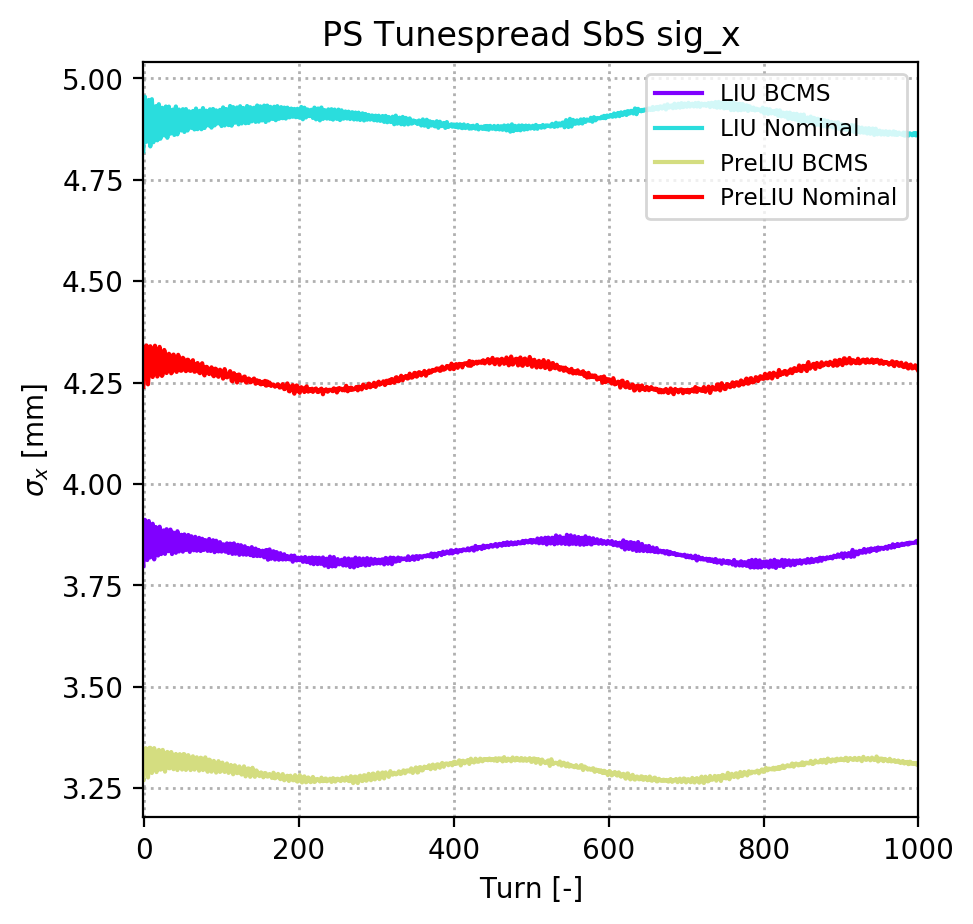

In [8]:
parameter = 'sig_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

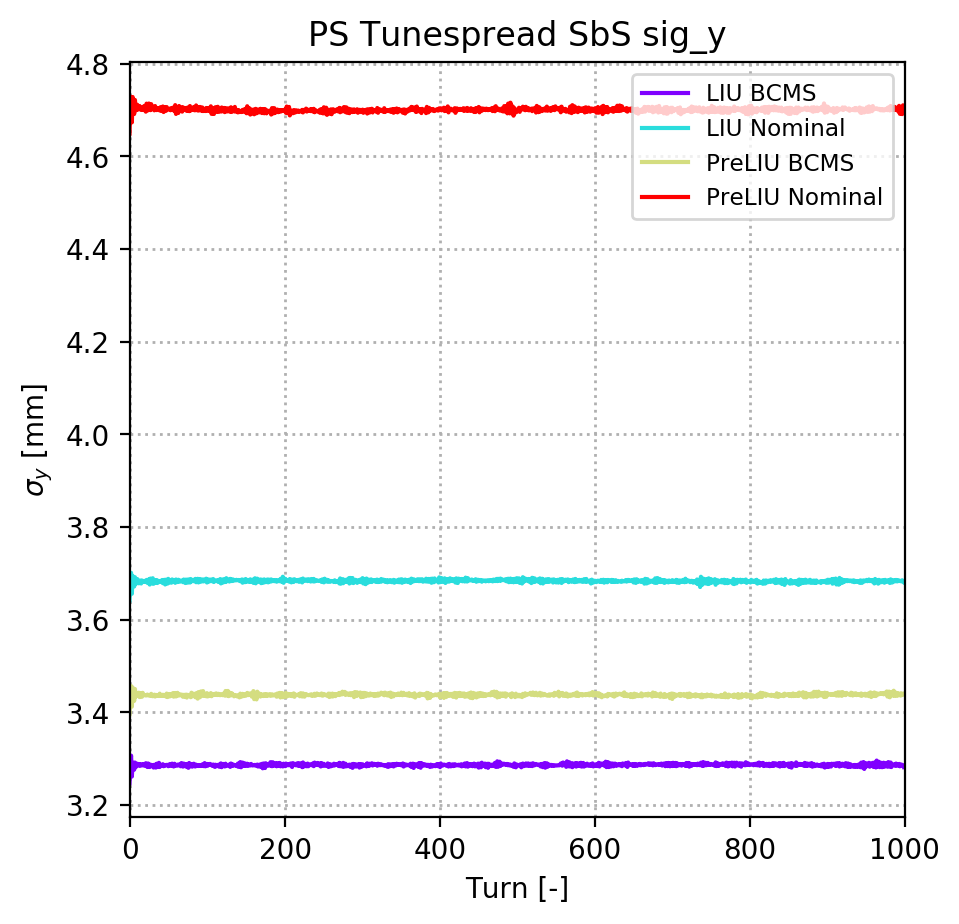

In [9]:
parameter = 'sig_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

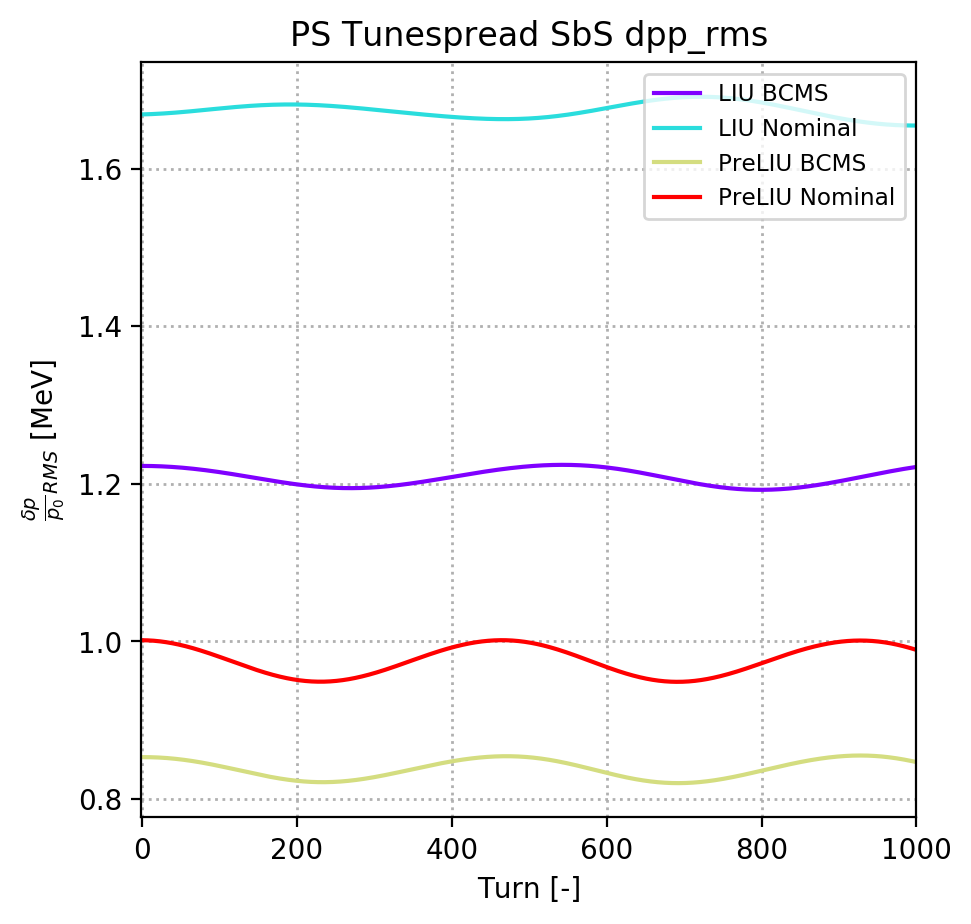

In [10]:
parameter = 'dpp_rms'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\delta p}{p_0}_{RMS}$ [MeV]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*1E3, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

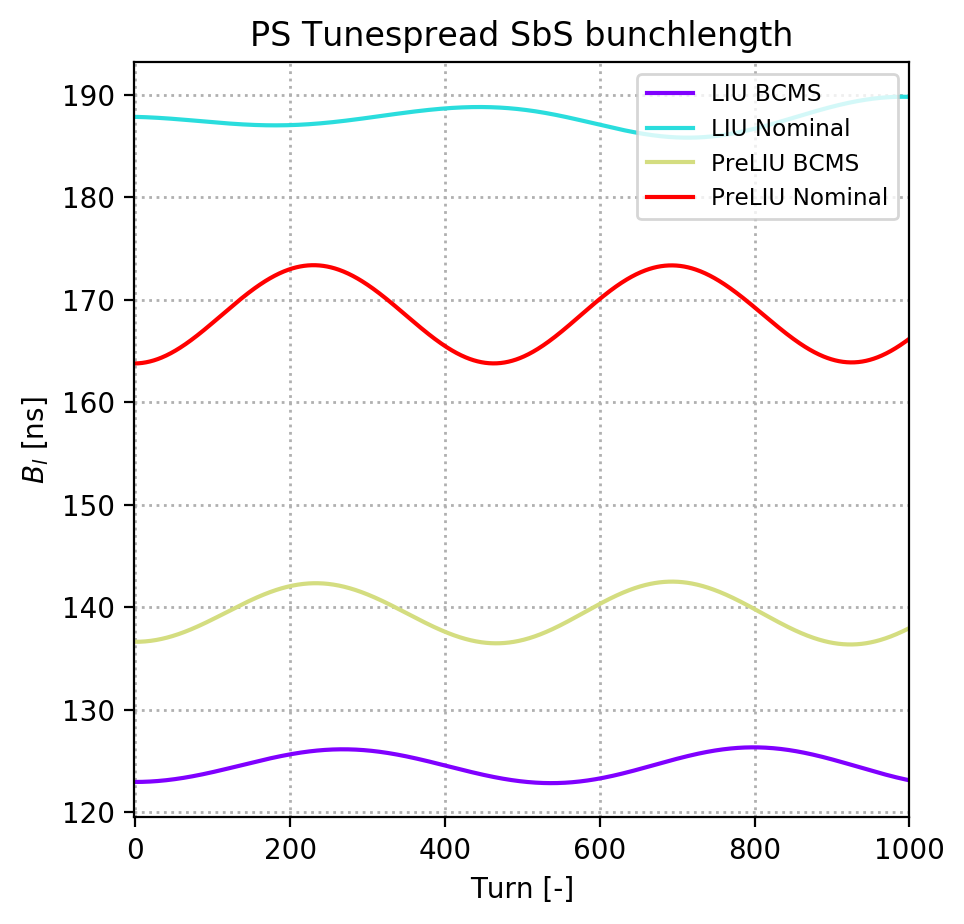

In [11]:
parameter = 'bunchlength'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$B_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*1E9, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

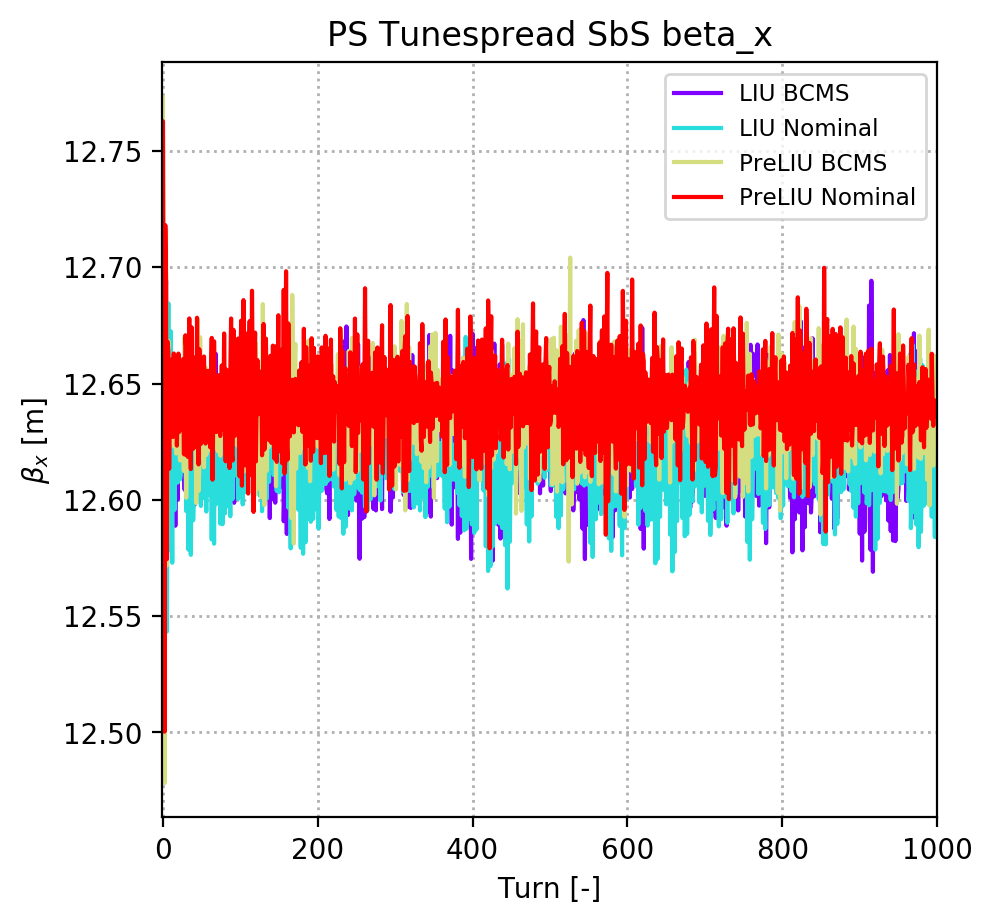

In [12]:
parameter = 'beta_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_{x}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

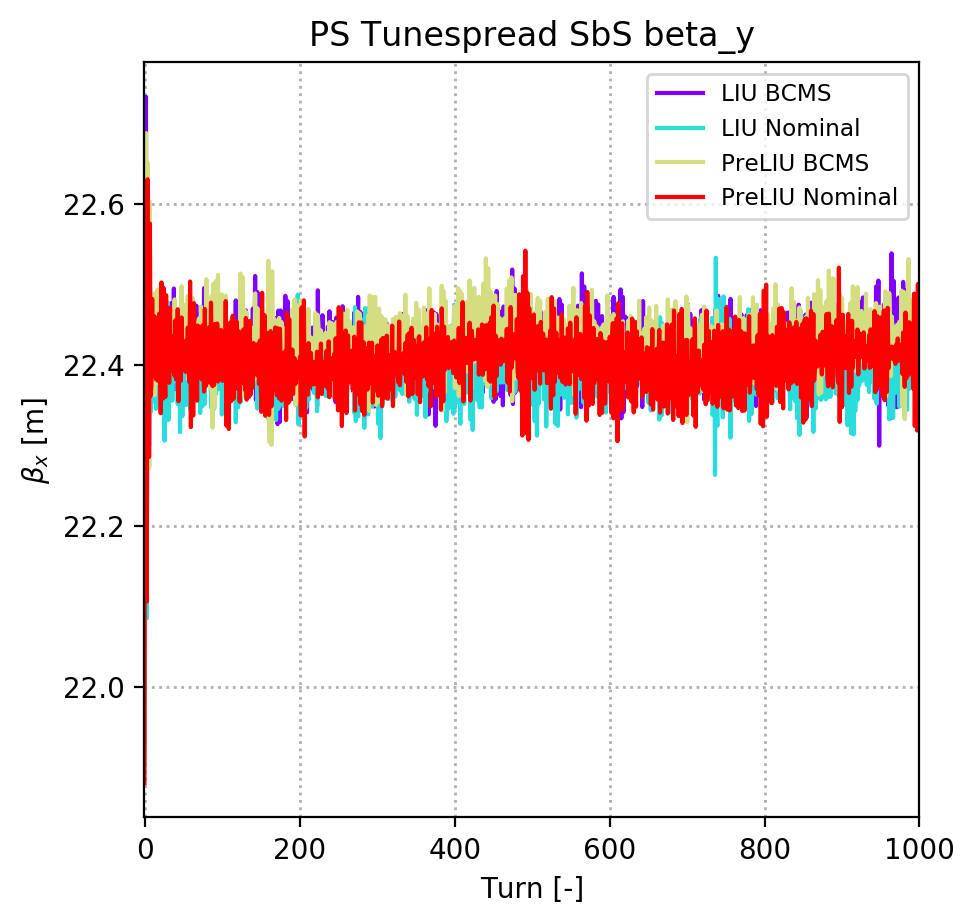

In [13]:
parameter = 'beta_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_{x}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

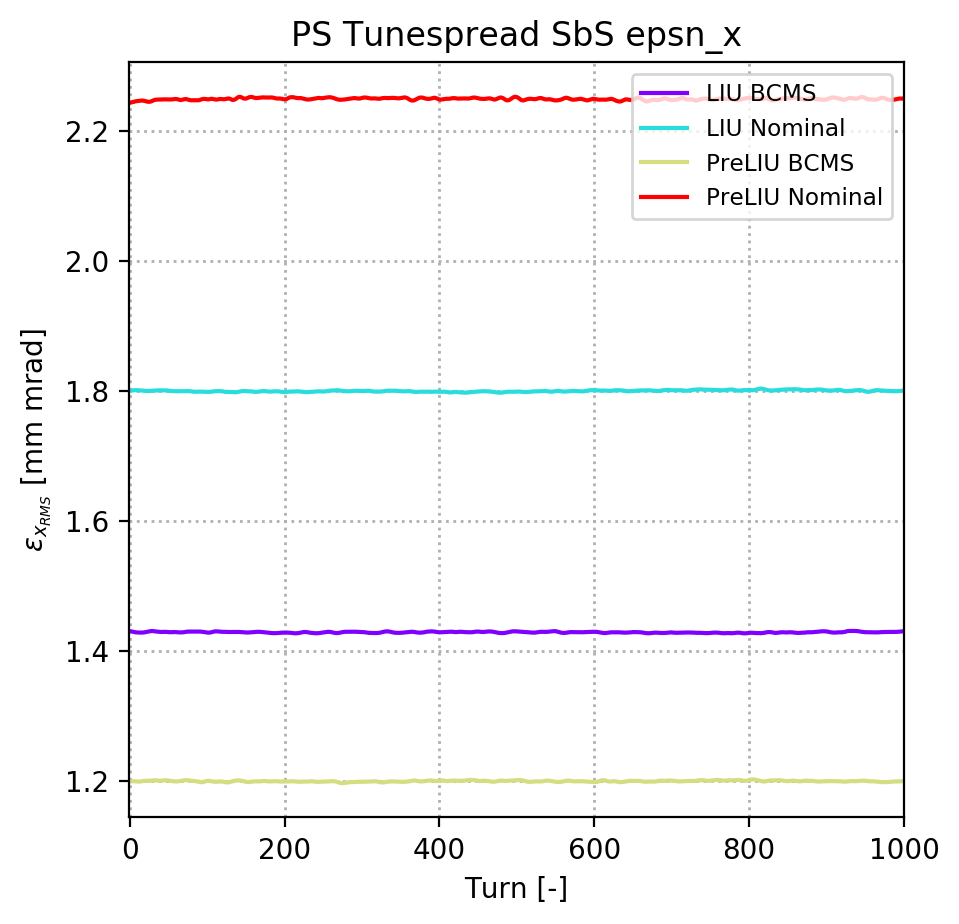

In [14]:
parameter = 'epsn_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_{x_{RMS}}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

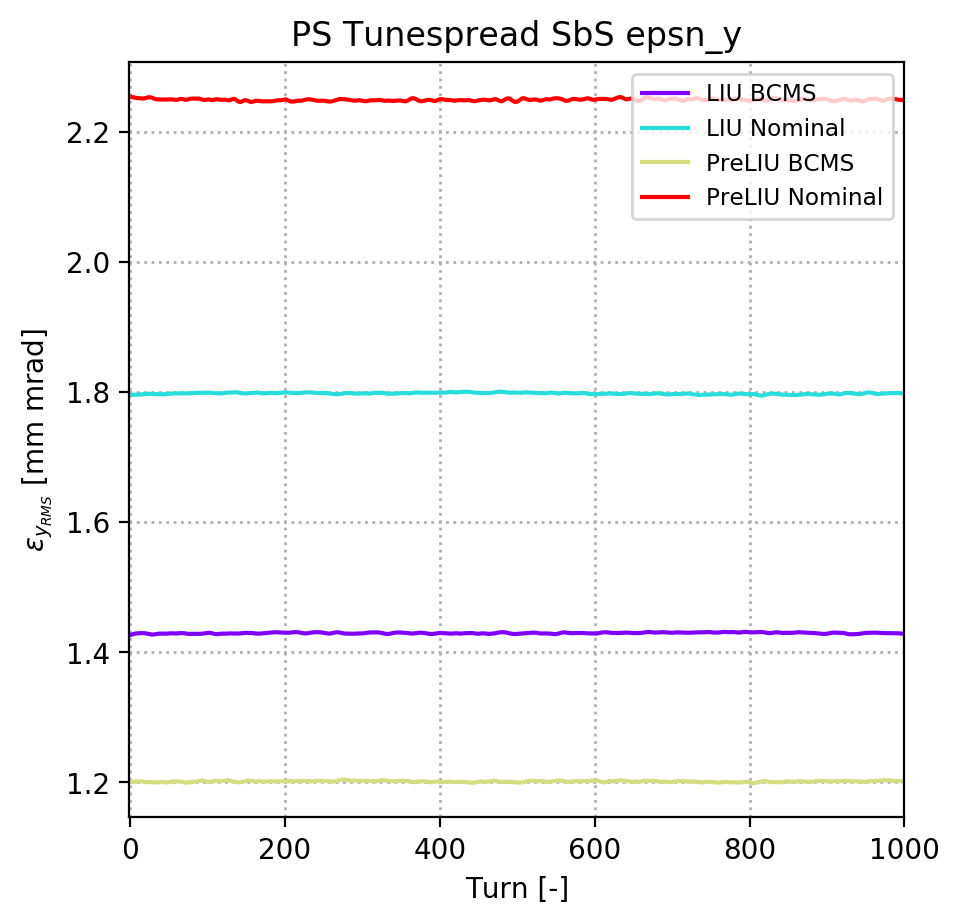

In [15]:
parameter = 'epsn_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_{y_{RMS}}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

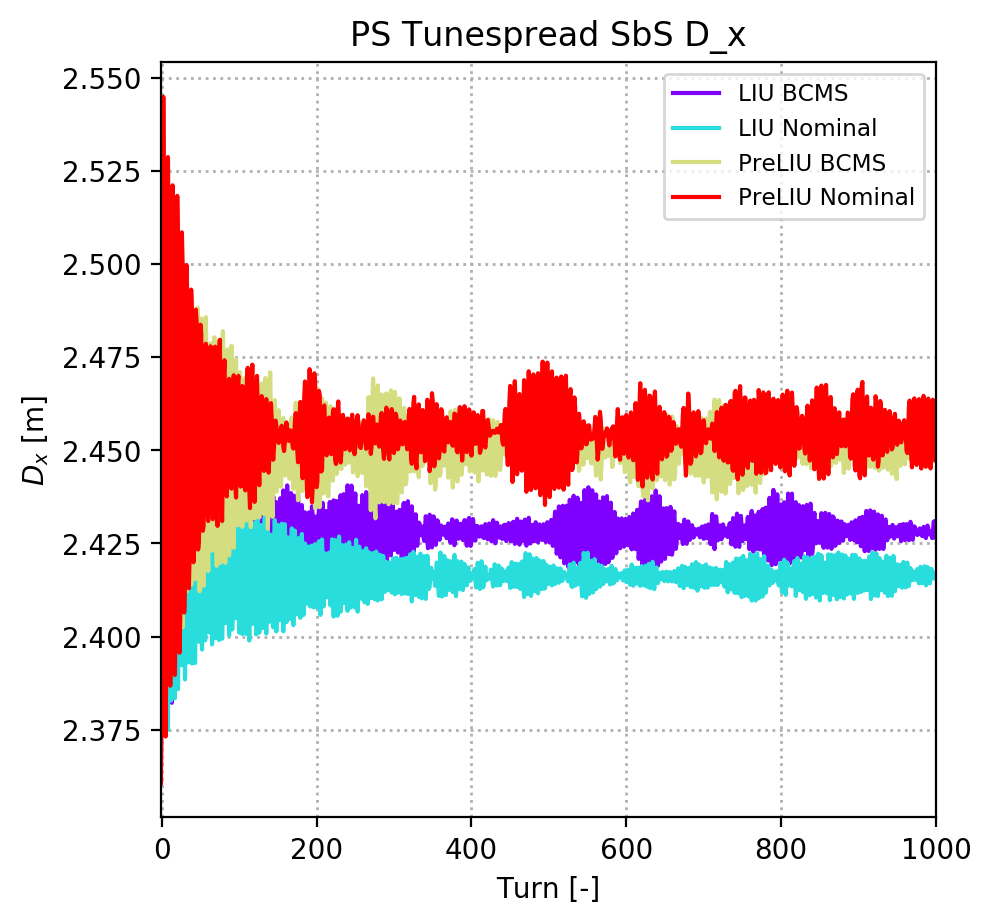

In [16]:
parameter = 'D_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$D_{x}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

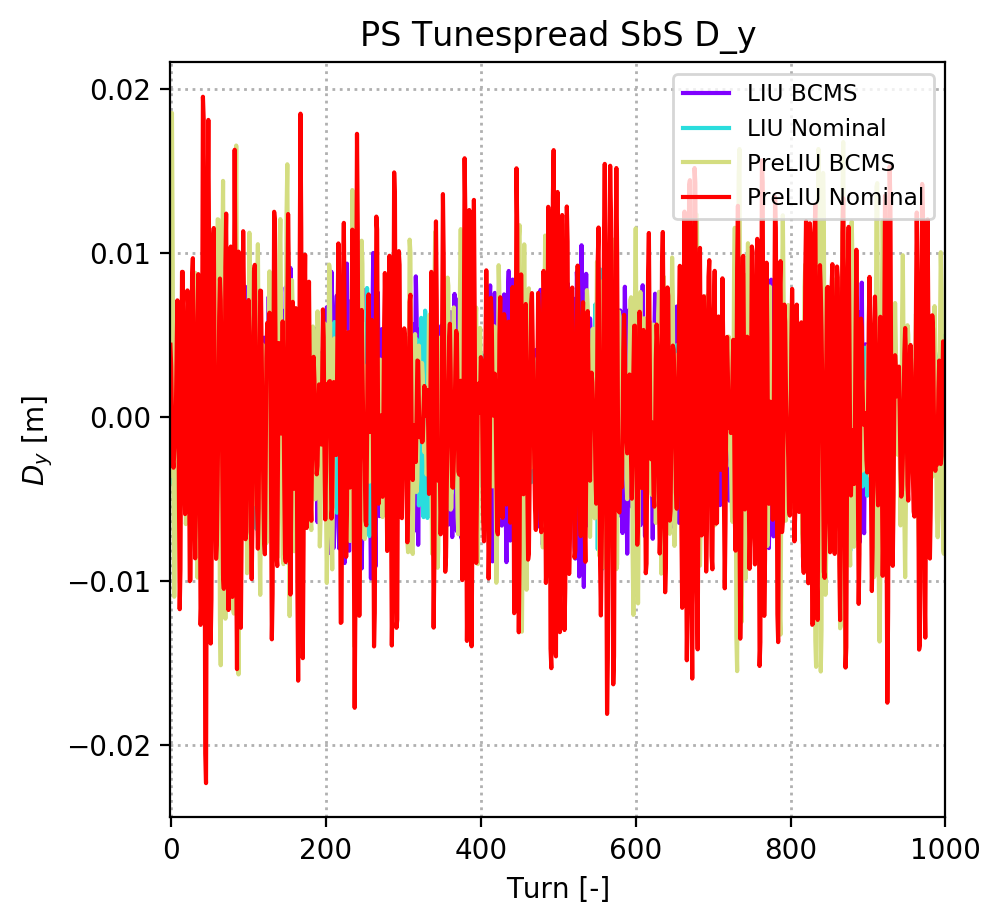

In [17]:
parameter = 'D_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$D_{y}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);